In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error#, mean_squared_log_error

%matplotlib inline

In [2]:
df = pd.read_csv("dataset/merged/prod_dataset.csv")
df.dropna(axis=1, how="all", inplace=True)

In [3]:
# for col in df:
#     if df[col].dtype in ["int64", "float64"]:
#         df[col] = df[col].astype("int32")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256250 entries, 0 to 5256249
Data columns (total 9 columns):
DAY_OF_WEEK            int64
UNIQUE_CARRIER         object
ORIGIN_AIRPORT_ID      int64
DEST_AIRPORT_ID        int64
DEP_DELAY              int64
SHIFT                  int64
NUM_WEEK               int64
ORIGIN_AIRPORT_RANK    float64
DEST_AIRPORT_RANK      float64
dtypes: float64(2), int64(6), object(1)
memory usage: 360.9+ MB


In [5]:
df

,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,SHIFT,NUM_WEEK,ORIGIN_AIRPORT_RANK,DEST_AIRPORT_RANK
0,3,AA,11298,11433,-3,645,1,1.00,1.00
1,4,AA,11298,11433,-4,645,1,1.00,1.00
2,5,AA,11298,11433,-5,645,2,1.00,1.00
3,6,AA,11298,11433,2,645,2,1.00,1.00
4,1,AA,11298,11433,7,645,2,1.00,1.00
5,2,AA,11298,11433,-1,645,2,1.00,1.00
6,3,AA,11298,11433,-5,645,2,1.00,1.00
7,4,AA,11298,11433,-2,645,2,1.00,1.00
8,5,AA,11298,11433,-4,645,3,1.00,1.00
9,6,AA,11298,11433,-4,645,3,1.00,1.00


In [5]:
#df.drop(["CRS_ARR_TIME", "DISTANCE", "ARR_DELAY"], axis=1, inplace = True)
#df.drop(["CRS_DEP_TIME"], axis=1, inplace = True)

In [5]:
# df = pd.concat([df, pd.get_dummies(df["UNIQUE_CARRIER"])], axis=1)
# df = pd.concat([df, pd.get_dummies(df["MONTH"], prefix="MONTH_")], axis=1)
# df = pd.concat([df, pd.get_dummies(df["DAY_OF_MONTH"], prefix="DAYM_")], axis=1)
# df = pd.concat([df, pd.get_dummies(df["DAY_OF_WEEK"], prefix="DAY_")], axis=1)
# df = pd.concat([df, pd.get_dummies(df["NUM_WEEK"], prefix="WEEK_")], axis=1)

# df = pd.concat([df, pd.get_dummies(df["ORIGIN_AIRPORT_ID"])], axis=1)
# df = pd.concat([df, pd.get_dummies(df["DEST_AIRPORT_ID"])], axis=1)
# df = pd.concat([df, pd.get_dummies(df["CRS_DEP_TIME"])], axis=1)
# df = pd.concat([df, pd.get_dummies(df["CRS_ARR_TIME"])], axis=1)

In [3]:
carrier_list = df["UNIQUE_CARRIER"].unique()  # required for prod

# df.drop(["UNIQUE_CARRIER"], axis=1, inplace = True)
# df.drop("MONTH", axis=1, inplace = True)
# df.drop("DAY_OF_MONTH", axis=1, inplace = True)
# df.drop("DAY_OF_WEEK", axis=1, inplace = True)
# df.drop("NUM_WEEK", axis=1, inplace = True)

# df.drop("ORIGIN_AIRPORT_ID", axis=1, inplace = True)
# df.drop("DEST_AIRPORT_ID", axis=1, inplace = True)
# df.drop("CRS_DEP_TIME", axis=1, inplace = True)
# df.drop("UNIQUE_CARRIER", axis=1, inplace = True)
# df.drop("CRS_ARR_TIME", axis=1, inplace = True)

In [5]:
week_format = True

if week_format:
    df = pd.concat([df, pd.get_dummies(df["UNIQUE_CARRIER"])], axis=1)
    df = pd.concat([df, pd.get_dummies(df["DAY_OF_WEEK"], prefix="DAY_")], axis=1)
    df = pd.concat([df, pd.get_dummies(df["NUM_WEEK"], prefix="WEEK_")], axis=1)

    df.drop(["UNIQUE_CARRIER"], axis=1, inplace = True)
    df.drop("DAY_OF_WEEK", axis=1, inplace = True)
    df.drop("NUM_WEEK", axis=1, inplace = True)
else:
    df = pd.concat([df, pd.get_dummies(df["UNIQUE_CARRIER"])], axis=1)
    df = pd.concat([df, pd.get_dummies(df["MONTH"], prefix="MONTH_")], axis=1)
    df = pd.concat([df, pd.get_dummies(df["DAY_OF_MONTH"], prefix="DAYM_")], axis=1)
    df = pd.concat([df, pd.get_dummies(df["DAY_OF_WEEK"], prefix="DAY_")], axis=1)

    df.drop(["UNIQUE_CARRIER"], axis=1, inplace=True)
    df.drop("MONTH", axis=1, inplace=True)
    df.drop("DAY_OF_MONTH", axis=1, inplace=True)
    df.drop("DAY_OF_WEEK", axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256250 entries, 0 to 5256249
Data columns (total 66 columns):
ORIGIN_AIRPORT_ID    int32
DEST_AIRPORT_ID      int32
DEP_DELAY            int32
SHIFT                int32
AA                   uint8
AS                   uint8
B6                   uint8
DL                   uint8
EV                   uint8
F9                   uint8
HA                   uint8
NK                   uint8
OO                   uint8
UA                   uint8
VX                   uint8
WN                   uint8
MONTH__1             uint8
MONTH__2             uint8
MONTH__3             uint8
MONTH__4             uint8
MONTH__5             uint8
MONTH__6             uint8
MONTH__7             uint8
MONTH__8             uint8
MONTH__9             uint8
MONTH__10            uint8
MONTH__11            uint8
MONTH__12            uint8
DAYM__1              uint8
DAYM__2              uint8
DAYM__3              uint8
DAYM__4              uint8
DAYM__5              ui

In [9]:
df.describe()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY,SHIFT,AA,AS,B6,DL,EV,F9,...,WEEK__44,WEEK__45,WEEK__46,WEEK__47,WEEK__48,WEEK__49,WEEK__50,WEEK__51,WEEK__52,WEEK__53
count,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,...,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06,5.256250e+06
mean,1.268139e+04,1.268093e+04,4.772070e+00,7.888426e+02,1.599102e-01,3.022440e-02,4.640247e-02,1.701125e-01,8.326221e-02,1.618340e-02,...,1.916956e-02,1.952209e-02,1.986759e-02,1.859025e-02,1.994844e-02,1.877612e-02,1.841960e-02,1.807772e-02,1.879058e-02,5.223115e-03
std,1.536334e+03,1.536152e+03,2.889505e+01,2.945613e+02,3.665228e-01,1.712042e-01,2.103552e-01,3.757317e-01,2.762782e-01,1.261804e-01,...,1.371207e-01,1.383509e-01,1.395452e-01,1.350728e-01,1.398231e-01,1.357335e-01,1.344631e-01,1.332326e-01,1.357848e-01,7.208214e-02
min,1.013500e+04,1.013500e+04,-2.040000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.129200e+04,1.129200e+04,-5.000000e+00,5.350000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.288900e+04,1.288900e+04,-2.000000e+00,7.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.405700e+04,1.405700e+04,4.000000e+00,1.035000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.621800e+04,1.621800e+04,2.149000e+03,1.424000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Split data

In [6]:
y = df["DEP_DELAY"]
X = df.drop("DEP_DELAY", axis=1)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256250 entries, 0 to 5256249
Data columns (total 76 columns):
Unnamed: 0           int32
ORIGIN_AIRPORT_ID    int32
DEST_AIRPORT_ID      int32
SHIFT                int32
AA                   uint8
AS                   uint8
B6                   uint8
DL                   uint8
EV                   uint8
F9                   uint8
HA                   uint8
NK                   uint8
OO                   uint8
UA                   uint8
VX                   uint8
WN                   uint8
DAY__1               uint8
DAY__2               uint8
DAY__3               uint8
DAY__4               uint8
DAY__5               uint8
DAY__6               uint8
DAY__7               uint8
WEEK__1              uint8
WEEK__2              uint8
WEEK__3              uint8
WEEK__4              uint8
WEEK__5              uint8
WEEK__6              uint8
WEEK__7              uint8
WEEK__8              uint8
WEEK__9              uint8
WEEK__10             ui

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X.values)

C:\Anaconda501\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2)

### La Linear Regression Classique ne passe pas en memoire

### Le Batch Gradient Descent ne vas aussi pas être testé car il necessite le calcul du gradient sur tout le dataset
c'est aussi très gourmand

### Stochastic Gradient Descent

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

In [15]:
# parameters = {'max_iter':[5, 10, 20, 40], 'penalty':[None, "l1", "l2", "elasticnet"], "alpha":[0.0001, 0.001, 0.01], "l1_ratio": [0.15, 0.5, 0.85] }  # max_iter=20, penalty=None, eta0 = 0.1
# model = SGDRegressor()
# reg = GridSearchCV(model, parameters, cv=3, scoring='neg_mean_absolute_error')
# reg.fit(X_train, y_train)

### Crash sur Notebook à cause de OOM. Test fait sur un script normal dont voici le resultat apres 40 min de calcul (512 model entrainés (4 (max iter)*4 (penalty)*3 (alpha)*3 (l1_ratio)*3 (cv)))

<img src="Projet 4 - training.png"/>

In [16]:
# print(reg.best_params_)
# print(reg.best_estimator_)

In [13]:
# parameters = {'max_iter':[20], 'penalty':["l2"], "alpha":[0.001], "l1_ratio": [0.85] }
# model = SGDRegressor()
# reg = GridSearchCV(model, parameters, cv=3, scoring='neg_mean_absolute_error')
# reg.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [20], 'penalty': ['l2'], 'alpha': [0.001], 'l1_ratio': [0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [14]:
# best_model = reg.best_estimator_

In [10]:
model = SGDRegressor(max_iter=20)
model.fit(X_train, y_train)
best_model = model

In [11]:
y_pred = best_model.predict(X_test)

In [17]:
print(mean_squared_error(y_test, y_pred)**(1/2))

28.4590328268


In [12]:
mean_absolute_error(y_test, y_pred)

12.477385331214609

In [19]:
a = 10
s = 100
pred = best_model.predict(X_test[s:s+a])
for x, y in zip(y_pred, y_test[s:s+a]):
    print(x, " => ", y)

4.28605594978  =>  -2
2.30136070063  =>  -6
3.54636199685  =>  0
0.218512537764  =>  14
-2.69249982045  =>  -4
2.77619369087  =>  -6
7.35112153123  =>  -4
6.23377444459  =>  19
2.30472363436  =>  18
1.09428989852  =>  -7


### Boosting

Comme il n'y a pas 50 modèle possible pour tant de données, on peut passer sur du bagging ou du boosting. Dans notre cas, on overfitt pas le modèle car ona un modèle linéaire donc le bagging n'a pas particulièrement d'interet mais le boosting peut aider

In [24]:
# from sklearn.ensemble import GradientBoostingRegressor

# Gbooster = GradientBoostingRegressor(
#                                     loss="lad",
#                                     n_estimators=20,
#                                     max_depth=3,
#                                     criterion = "mae"
#                                    )

In [25]:
# Gbooster.fit(X_train, y_train)

In [26]:
# y_pred = Gbooster.predict(X_test)
# print(mean_squared_error(y_test, y_pred)**(1/2))
# print(mean_absolute_error(y_test, y_pred))

In [27]:
# a = 10
# s = 100
# pred = Gbooster.predict(X_test[s:s+a])
# for x, y in zip(y_pred, y_test[s:s+a]):
#     print(x, " => ", y)

In [13]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
booster = AdaBoostRegressor(
                            base_estimator=best_model,
                            n_estimators=5,
                            loss="linear"
                           )

In [ ]:
booster.fit(X_train, y_train)

In [ ]:
y_pred = booster.predict(X_test)
print(mean_squared_error(y_test, y_pred)**(1/2))
print(mean_absolute_error(y_test, y_pred))

In [ ]:
a = 10
s = 100
pred = booster.predict(X_test[s:s+a])
for x, y in zip(y_pred, y_test[s:s+a]):
    print(x, " => ", y)

### Analyse

In [ ]:
# features_name = list(X)
# nb_features = len(list(X))
# reg_name = ['SGDRegressor', 'AdaBoost'] # 'Gradient Boosting'
# nb_reg = len(reg_name)

# df_importance = pd.DataFrame(columns=range(nb_features))

# column_pairs = dict(zip(list(range(nb_features)), features_name))
# index_pairs = dict(zip(list(range(nb_reg)),reg_name))  

# df_importance.loc[0] = best_model.coef_
# df_importance.loc[1] = booster.coef_ #feature_importances_
# #df_importance.loc[2] = Gbooster.feature_importances_

# df_importance2 = df_importance.rename(index=index_pairs, columns=column_pairs)
# df_importance2.T

# plt.figure(figsize = (18, 6))
# sns.heatmap(df_importance2, cmap='Blues')

### Bonus - Simple NN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy

Using TensorFlow backend.


In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
model = Sequential()
model.add(Dense(150, input_dim=X_train.shape[1], activation='elu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error']) => loss 12.61
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=5000, callbacks = [early_stop])

# https://stackoverflow.com/questions/46999519/keras-model-fit-unboundlocalerror

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=5000, callbacks = [early_stop])

In [ ]:
print("{} - {:.2f}".format(model.metrics_names[1], scores[1]))
print("{} - {:.2f}".format(model.metrics_names[2], scores[2]))

In [ ]:
a = 10
s = 100
pred = model.predict(X_test[s:s+a])
for x, y in zip(pred, y_test[s:s+a]):
    print(x[0], " => ", y)

### Sauvegarde du model pour Webservice

In [43]:
from sklearn.externals import joblib

joblib.dump(scaler, 'scaler.pkl') 
joblib.dump(booster, 'model.pkl') 
#clf = joblib.load('filename.pkl')

['model.pkl']

In [4]:
airports = pd.read_csv("L_AIRPORT_ID.csv")
companies = pd.read_csv("L_UNIQUE_CARRIERS.csv")

In [39]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 2 columns):
Code           1632 non-null object
Description    1633 non-null object
dtypes: object(2)
memory usage: 25.6+ KB


In [5]:
first = df["DEST_AIRPORT_ID"].unique()
second = df["ORIGIN_AIRPORT_ID"].unique()
third = list(set(first) | set(second)) 
print(third)

[0.75, 1.0, 0.25, 0.5]


In [69]:
aiport_dict = {key : airports[airports["Code"] == key]["Description"].values[0].split(":")[-1].strip() for key in third}

In [68]:
# aiport_dict = {}
# for key in third:
#     print(airports[airports["Code"] == key]["Description"].values[0].split(":")[-1].strip())
#     aiport_dict[key] =

James M Cox/Dayton International
King Salmon Airport
Tulsa International
Ronald Reagan Washington National
Tucson International
Albany International
Cherry Capital
Denver International
Joslin Field - Magic Valley Regional
General Mitchell International
Muskegon County
Dallas/Fort Worth International
Wilmington International
Rick Husband Amarillo International
Texarkana Regional-Webb Field
Dothan Regional
Ford
Melbourne International
Indianapolis International
McGhee Tyson
Tyler Pounds Regional
Quad City International
Falls International Einarson Field
Ted Stevens Anchorage International
Monroe Regional
Dillingham Airport
Duluth International
Mammoth Lakes Airport
Alpena County Regional
Sloulin Field International
Long Island MacArthur
Ithaca Tompkins Regional
Mobile Regional
Hilo International
Rapid City Regional
Minot International
Aspen Pitkin County Sardy Field
Northeast Florida Regional
Sawyer International
Durango La Plata County
Redding Municipal
Jackson Hole
Roberts Field
Raleig

In [65]:
print(aiport_dict)

{11267: 'Dayton, OH: James M Cox/Dayton International', 10245: 'King Salmon, AK: King Salmon Airport', 15370: 'Tulsa, OK: Tulsa International', 11278: 'Washington, DC: Ronald Reagan Washington National', 15376: 'Tucson, AZ: Tucson International', 10257: 'Albany, NY: Albany International', 15380: 'Traverse City, MI: Cherry Capital', 11292: 'Denver, CO: Denver International', 15389: 'Twin Falls, ID: Joslin Field - Magic Valley Regional', 13342: 'Milwaukee, WI: General Mitchell International', 13344: 'Muskegon, MI: Muskegon County', 11298: 'Dallas/Fort Worth, TX: Dallas/Fort Worth International', 12323: 'Wilmington, NC: Wilmington International', 10279: 'Amarillo, TX: Rick Husband Amarillo International', 15401: 'Texarkana, AR: Texarkana Regional-Webb Field', 11308: 'Dothan, AL: Dothan Regional', 12335: 'Iron Mountain/Kingsfd, MI: Ford', 13360: 'Melbourne, FL: Melbourne International', 12339: 'Indianapolis, IN: Indianapolis International', 15412: 'Knoxville, TN: McGhee Tyson', 15411: 'Tyl

In [41]:
carrier_list

array(['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'NK', 'EV', 'OO', 'UA', 'VX',
       'WN'], dtype=object)

In [62]:
comp_dict = {key : companies[companies["Code"] == key]["Description"].values[0] for key in carrier_list}

In [63]:
print(comp_dict)

{'AA': 'American Airlines Inc.', 'AS': 'Alaska Airlines Inc.', 'B6': 'JetBlue Airways', 'DL': 'Delta Air Lines Inc.', 'F9': 'Frontier Airlines Inc.', 'HA': 'Hawaiian Airlines Inc.', 'NK': 'Spirit Air Lines', 'EV': 'ExpressJet Airlines Inc.', 'OO': 'SkyWest Airlines Inc.', 'UA': 'United Air Lines Inc.', 'VX': 'Virgin America', 'WN': 'Southwest Airlines Co.'}


In [61]:
# for key in carrier_list:
#     print(companies[companies["Code"] == key]["Description"].values[0])

American Airlines Inc.
Alaska Airlines Inc.
JetBlue Airways
Delta Air Lines Inc.
Frontier Airlines Inc.
Hawaiian Airlines Inc.
Spirit Air Lines
ExpressJet Airlines Inc.
SkyWest Airlines Inc.
United Air Lines Inc.
Virgin America
Southwest Airlines Co.


In [12]:
import pickle
def save_obj(obj, name ):
    with open('prod/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

NameError: name 'aiport_dict' is not defined

In [13]:
save_obj(aiport_dict, "airport")
save_obj(comp_dict, "company")
save_obj(list(X), "index")

## Exploration post mise en place modèle

In [1]:
import numpy as np
loaded = np.load('models/data/matrices.npz')

X_train = loaded["X_train"]
y_train = loaded["y_train"]
X_test = loaded["X_test"]
y_test = loaded["y_test"]

In [7]:
print(y_train.mean())
print(y_train.std())

7.79045398335
27.8753076751


(array([      0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,  709595.,   29384.,
          21895.,   18991.,   16413.,   15024.,   13508.,   12074.,
          11184.,   10165.,    9669.,    8738.,    8080.,    7466.,
           7130.,    6618.,    6184.,    5875.,   10864.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19]),
 <a list of 29 Patch objects>)

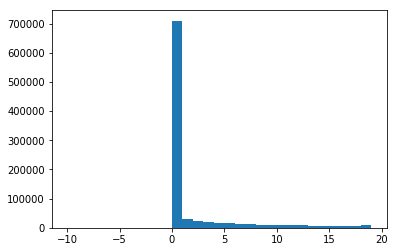

In [6]:
plt.hist(y_test, bins=range(-10,20))

In [2]:
from sklearn.externals import joblib
booster = joblib.load("prod/model_v1.pkl")

In [3]:
booster.coef_

array([  9.08786346e-02,  -5.30262975e-03,  -1.46746330e-02,
         1.31091922e-02,  -9.93059001e-03,  -1.50490842e-02,
        -2.63539698e-03,   2.74131379e-04,   6.47768867e-04,
        -1.43133225e-02,   1.01751878e-02,   6.81321869e-03,
         2.62896632e-02,   1.86528240e-03,  -6.26391514e-03,
        -4.31676183e-03,   7.58382838e-03,   7.99653064e-03,
        -3.37398440e-03,   0.00000000e+00,   1.50296102e-02,
        -1.08988912e-03,   0.00000000e+00,  -1.16714451e-02,
        -1.85924081e-02,  -1.33206061e-02,   4.16430970e-03,
        -1.02642577e-02,  -1.57707501e-02,  -8.70569043e-03,
         1.29403480e-03,   2.68925537e-03,   0.00000000e+00,
         0.00000000e+00,  -7.75877254e-03,  -7.69746687e-03,
        -1.17663882e-02,   3.38516541e-03,  -3.26260789e-03,
        -2.24064525e-03,  -1.61918627e-03,  -4.08435241e-03,
         0.00000000e+00,   1.09609133e-02,   1.21265090e-02,
         1.44631153e-02,   8.06486279e-04,   6.57832872e-03,
         1.29218966e-02,

0 SHIFT
1 AA
2 AS
3 B6
4 DL
5 EV
6 F9
7 HA
8 NK
9 OO
10 UA
11 VX
12 WN
13 DAY__1
14 DAY__2
15 DAY__3
16 DAY__4
17 DAY__5
18 DAY__6
19 DAY__7
20 WEEK__1
21 WEEK__2
22 WEEK__3
23 WEEK__4
24 WEEK__5
25 WEEK__6
26 WEEK__7
27 WEEK__8
28 WEEK__9
29 WEEK__10
30 WEEK__11
31 WEEK__12
32 WEEK__13
33 WEEK__14
34 WEEK__15
35 WEEK__16
36 WEEK__17
37 WEEK__18
38 WEEK__19
39 WEEK__20
40 WEEK__21
41 WEEK__22
42 WEEK__23
43 WEEK__24
44 WEEK__25
45 WEEK__26
46 WEEK__27
47 WEEK__28
48 WEEK__29
49 WEEK__30
50 WEEK__31
51 WEEK__32
52 WEEK__33
53 WEEK__34
54 WEEK__35
55 WEEK__36
56 WEEK__37
57 WEEK__38
58 WEEK__39
59 WEEK__40
60 WEEK__41
61 WEEK__42
62 WEEK__43
63 WEEK__44
64 WEEK__45
65 WEEK__46
66 WEEK__47
67 WEEK__48
68 WEEK__49
69 WEEK__50
70 WEEK__51
71 WEEK__52
72 WEEK__53
73 ORIGIN_RANK__0.25
74 ORIGIN_RANK__0.5
75 ORIGIN_RANK__0.75
76 ORIGIN_RANK__1.0
77 DEST_RANK__0.25
78 DEST_RANK__0.5
79 DEST_RANK__0.75
80 DEST_RANK__1.0


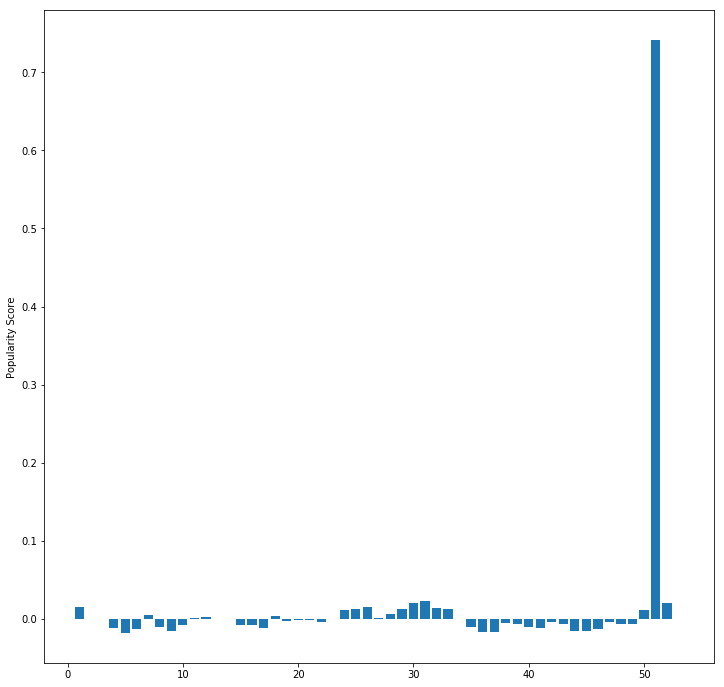

In [4]:
import seaborn as sns 
import pickle

def load_obj(name):
    with open("prod/" + name + '.pkl', 'rb') as f:
        return pickle.load(f)

index_arr = load_obj("index")
for i, feature in enumerate(index_arr):
    print(i, feature)

# plt.figure(figsize=(12,12))
# correlation_matrix = booster.coef_[20:72].reshape(-1,1)
# sns.barplot(correlation_matrix) 
# plt.savefig("img/coef.png")
# plt.show()

x = []
y = []
for key, value in zip(booster.coef_, index_arr):
    if value.startswith("WEEK_"):
        x.append(int(value[6:]))
        y.append(key)

plt.figure(figsize=(12,12))
plt.bar(x, y)
# plt.xticks(x_pos, people) 
plt.ylabel('Popularity Score')
plt.show()

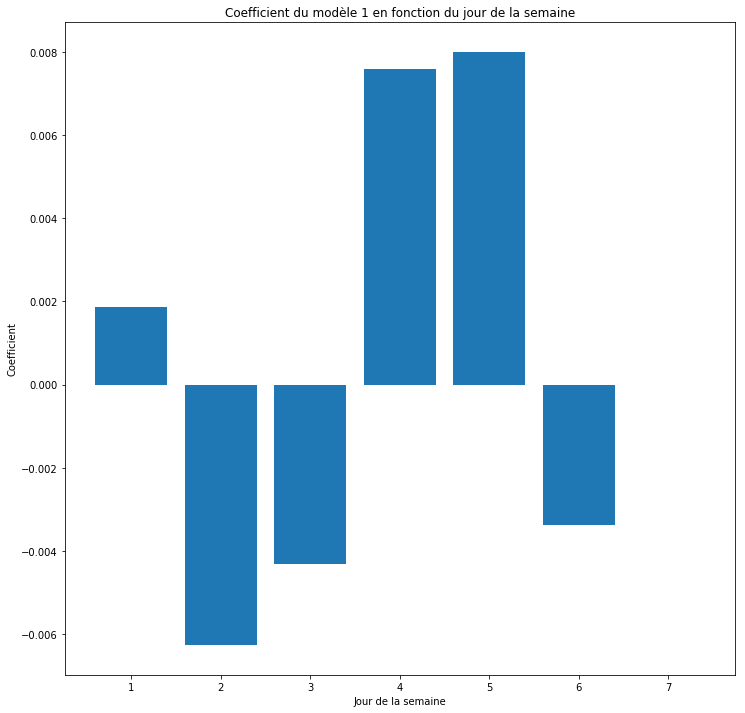

In [6]:
x = []
y = []
for key, value in zip(booster.coef_, index_arr):
    if value.startswith("DAY_"):
        x.append(int(value[5:]))
        y.append(key)

plt.figure(figsize=(12,12))
plt.bar(x, y)
# plt.xticks(x_pos, people) 
plt.xlabel('Jour de la semaine')
plt.ylabel('Coefficient')
plt.title("Coefficient du modèle 1 en fonction du jour de la semaine")
plt.savefig("img/model_1_week.png")
plt.show()

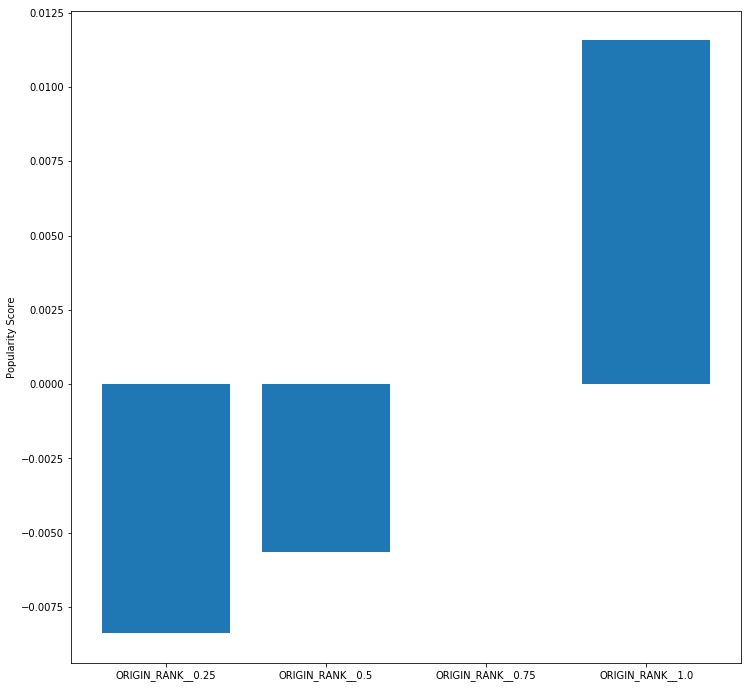

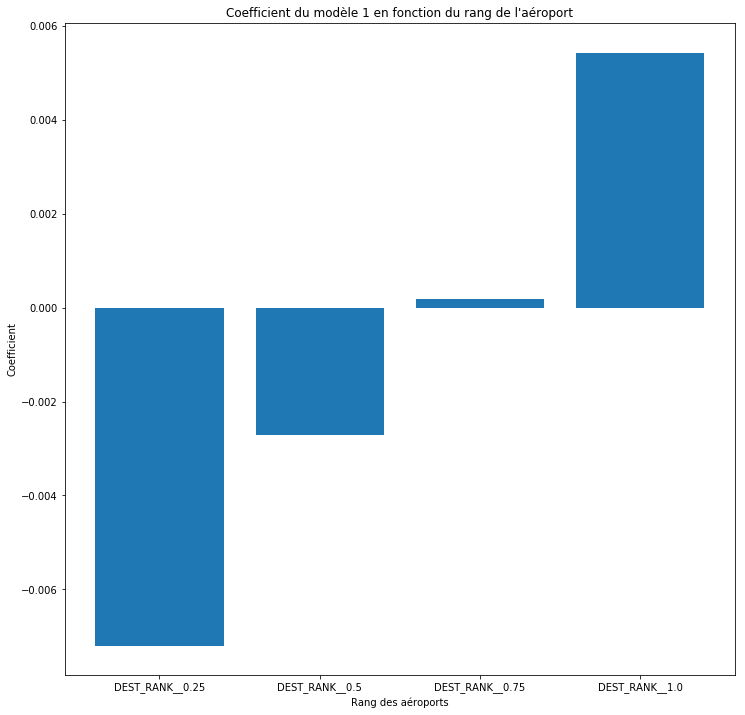

In [7]:
x = []
y = []
for key, value in zip(booster.coef_, index_arr):
    if value.startswith("ORIGIN_"):
        x.append(value)
        y.append(key)

plt.figure(figsize=(12,12))
plt.bar(x, y)
# plt.xticks(x_pos, people) 
plt.ylabel('Popularity Score')
plt.show()

x = []
y = []
for key, value in zip(booster.coef_, index_arr):
    if value.startswith("DEST_"):
        x.append(value)
        y.append(key)

plt.figure(figsize=(12,12))
plt.bar(x, y)
plt.xlabel('Rang des aéroports')
plt.ylabel('Coefficient')
plt.title("Coefficient du modèle 1 en fonction du rang de l'aéroport")
plt.savefig("img/model_1_rank.png")
plt.show()

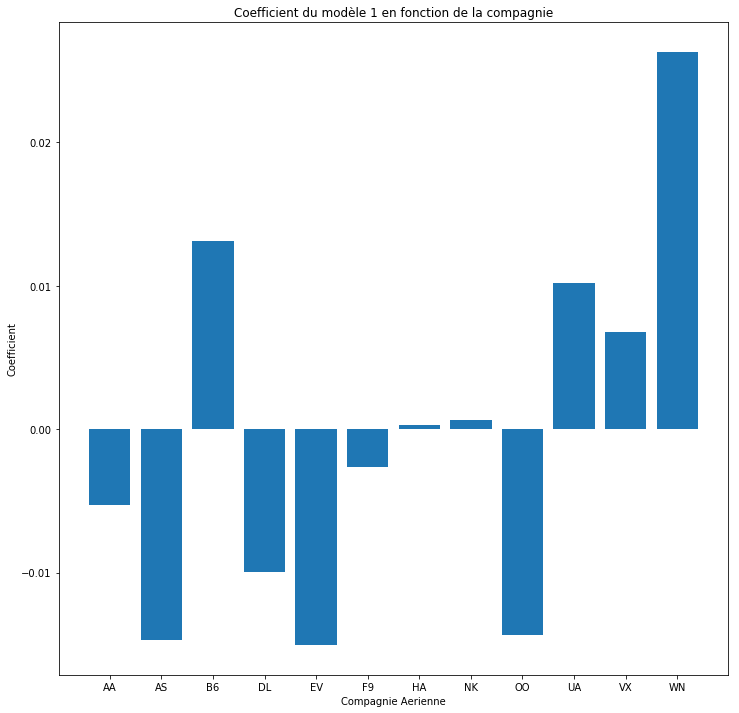

In [8]:
x = []
y = []
for key, value in zip(booster.coef_, index_arr):
    if len(value) == 2:
        x.append(value)
        y.append(key)

plt.figure(figsize=(12,12))
plt.bar(x, y)
# plt.xticks(x_pos, people) 
plt.xlabel('Compagnie Aerienne')
plt.ylabel('Coefficient')
plt.title("Coefficient du modèle 1 en fonction de la compagnie")
plt.savefig("img/model_1_company.png")
plt.show()